In [2]:
# import libraries 
import numpy as np
import pandas as pd
import seaborn as sns
import scipy.stats as stats
import statsmodels.api as sm
import matplotlib.pyplot as plt

In [3]:
# define global figure properties 
import matplotlib_inline.backend_inline
matplotlib_inline.backend_inline.set_matplotlib_formats('svg') # display figures in vector format
plt.rcParams.update({'font.size':14,             # font size
                     'axes.titlelocation':'left',# title location
                     'axes.spines.right':False,  # remove axis bounding box
                     'axes.spines.top':False,    # remove axis bounding box
                     })

# Exe 1

In [12]:
# the data 
icecream  = np.array([ 1, 2, 4, 5, 7 ])
happiness = np.array([ 5, 6.5, 6, 8, 9 ])


In [13]:
# design matrix
x = np.vstack((icecream,np.ones(len(icecream)))).T


In [14]:
# left inverse
leftInv = np.linalg.inv(x.T@X)@x.T


In [15]:
# regression coefficients
betas = leftInv@happiness
betas # compare to output of sm.OLS: [0.6096, 4.5833]

array([0.60964912, 4.58333333])

# Exe 2

In [16]:
# sample size
n = 100

# create data and design matrix
dv = np.random.randn(n)
dm = np.random.randn(n,1) # change 1 to 37

# fit the model (including intercept)
model = sm.OLS(dv,sm.add_constant(dm)).fit()

# print the r-squared terms
print(f'    R-squared: {model.rsquared:.3f}')
print(f'adj.R-squared: {model.rsquared_adj:.3f}')

    R-squared: 0.006
adj.R-squared: -0.004


In [18]:
# initializations
nivs = np.arange(1,n,3)
results = np.zeros((len(nivs),2))


# the experiment
for idx,m in enumerate(nivs):

  # loop over repetitions with new random numbers
  for expi in range(50):

    # create data and design matrix
    dv = np.random.randn(n)
    dm = np.random.randn(n,m)

    # fit the model (including intercept)
    model = sm.OLS(dv,sm.add_constant(dm)).fit()

    # get the r-squared terms
    results[idx,0] += 100*model.rsquared
    results[idx,1] += 100*model.rsquared_adj

# divide for the average
results /= (expi+1)

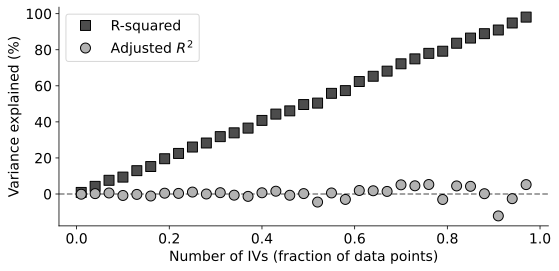

In [21]:
# plot
plt.figure(figsize=(8,4))
plt.plot(nivs/n,results[:,0],'ks',markersize=10,markerfacecolor=(.3,.3,.3),label='R-squared')
plt.plot(nivs/n,results[:,1],'ko',markersize=10,markerfacecolor=(.7,.7,.7),label=r'Adjusted $R^2$')

# adjustments
plt.axhline(y=0,color='gray',linestyle='--',zorder=-4)
plt.xlabel('Number of IVs (fraction of data points)')
plt.ylabel('Variance explained (%)')
plt.legend()

# display the figure
plt.tight_layout()
plt.show()

In [22]:
# testing the model on new data drawn from the same population
print('R2 for these data:')
print(f'  {np.corrcoef(model.predict(sm.add_constant(dm)),dv)[0,1]**2:.3f}')

print('')
print('R2 for new data from the same population:')
print(f'  {np.corrcoef(model.predict(sm.add_constant(dm)),np.random.randn(n))[0,1]**2:.3f}')

R2 for these data:
  0.992

R2 for new data from the same population:
  0.006
